# ABDOUL AZIZ BAOULA 


In [3]:
# Importing libraries
import sys
from datetime import datetime
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
from sklearn.metrics import mean_squared_error

# seed configuration
np.random.seed(38)
torch.manual_seed(38)

In [4]:
# import modules
### BEGIN SOLUTION
 
# import dataset
covid = pd.read_csv("Data/day_wise.csv")

### END SOLUTION

In [5]:
covid

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [6]:
# compute dtype
for column in covid.columns:
    print(f"The data type for '{column}' column is: {covid[column].dtype}")

The data type for 'Date' column is: object
The data type for 'Confirmed' column is: int64
The data type for 'Deaths' column is: int64
The data type for 'Recovered' column is: int64
The data type for 'Active' column is: int64
The data type for 'New cases' column is: int64
The data type for 'New deaths' column is: int64
The data type for 'New recovered' column is: int64
The data type for 'Deaths / 100 Cases' column is: float64
The data type for 'Recovered / 100 Cases' column is: float64
The data type for 'Deaths / 100 Recovered' column is: float64
The data type for 'No. of countries' column is: int64


In [7]:
covid = covid.rename(columns={'New cases': 'NewCases'})

In [8]:
confirmation_counts = covid['NewCases'].value_counts()
confirmation_counts

0         1
137833    1
106438    1
106900    1
105289    1
         ..
62960     1
64400     1
67657     1
59577     1
228693    1
Name: NewCases, Length: 188, dtype: int64

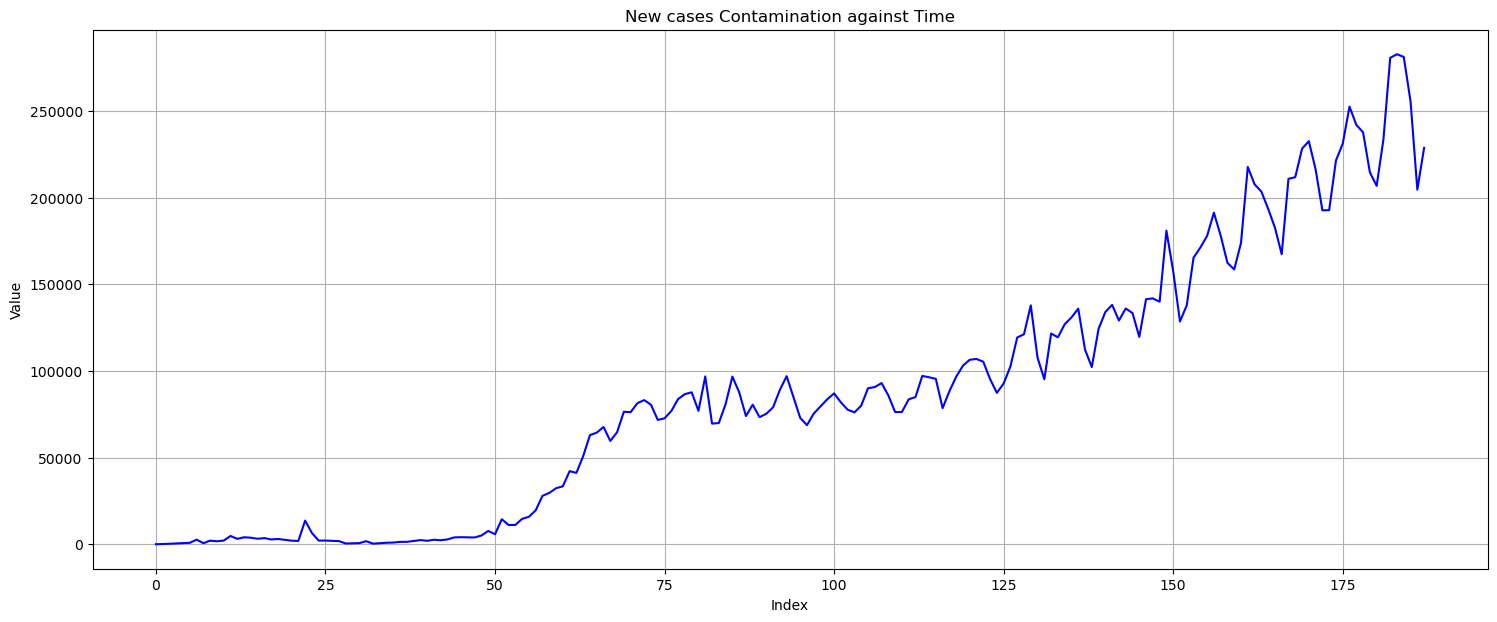

In [9]:
# plot time plot 
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
ax.set_title("New cases Contamination against Time")
ax.grid(True)
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.plot(
    covid['NewCases'],
    color='blue', label='Data');

In [10]:
# split dataset
df_train, df_test = train_test_split(covid, train_size=0.7, shuffle=False)

# display training dataset length
print(f"The length of training dataset is: {len(df_train)}")

# display test dataset length
print(f"The length of test dataset is: {len(df_test)}")

The length of training dataset is: 131
The length of test dataset is: 57


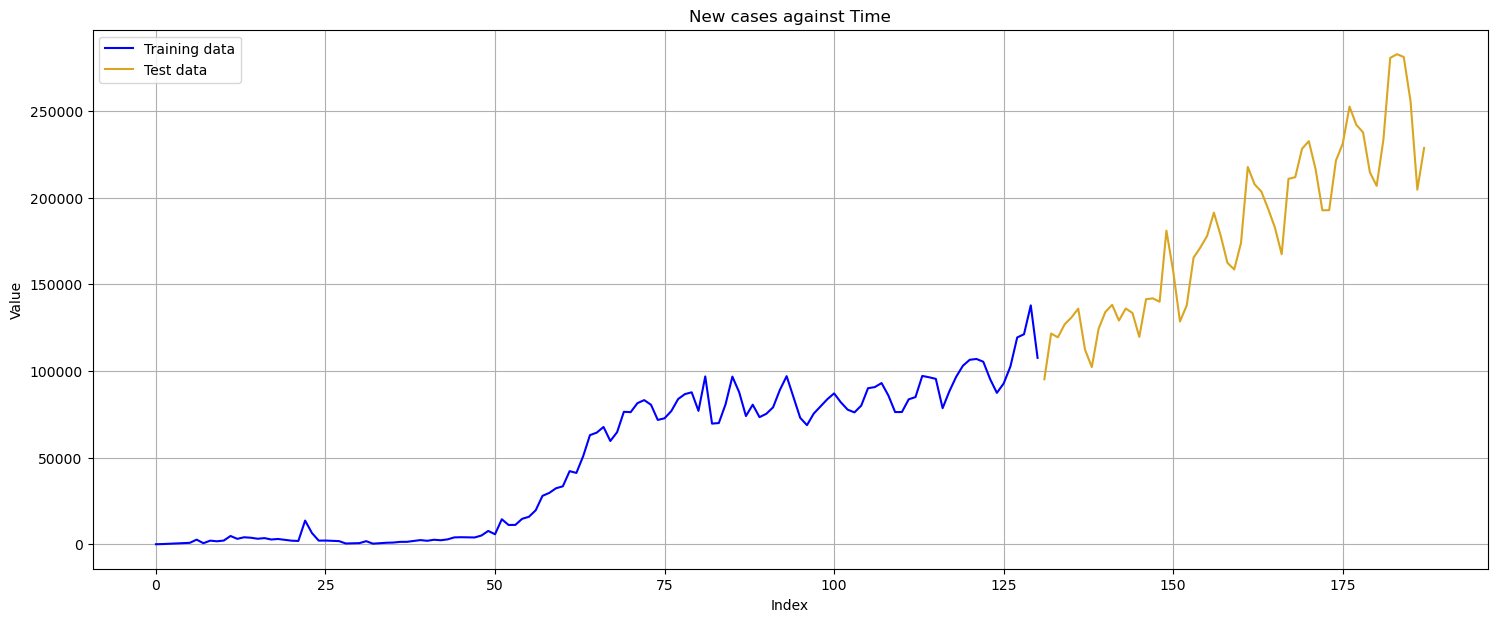

In [11]:
# plot time plot for training and test dataset 
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
ax.set_title("New cases against Time")
ax.grid(True)
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.plot(
    df_train['NewCases'],
    color='blue', label='Training data');
ax.plot(
    df_test['NewCases'],
    color='goldenrod', label='Test data')
ax.legend();

In [12]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(df_train['NewCases'].values.reshape(-1,1))
test_scaled = scaler.transform(df_test['NewCases'].values.reshape(-1,1))



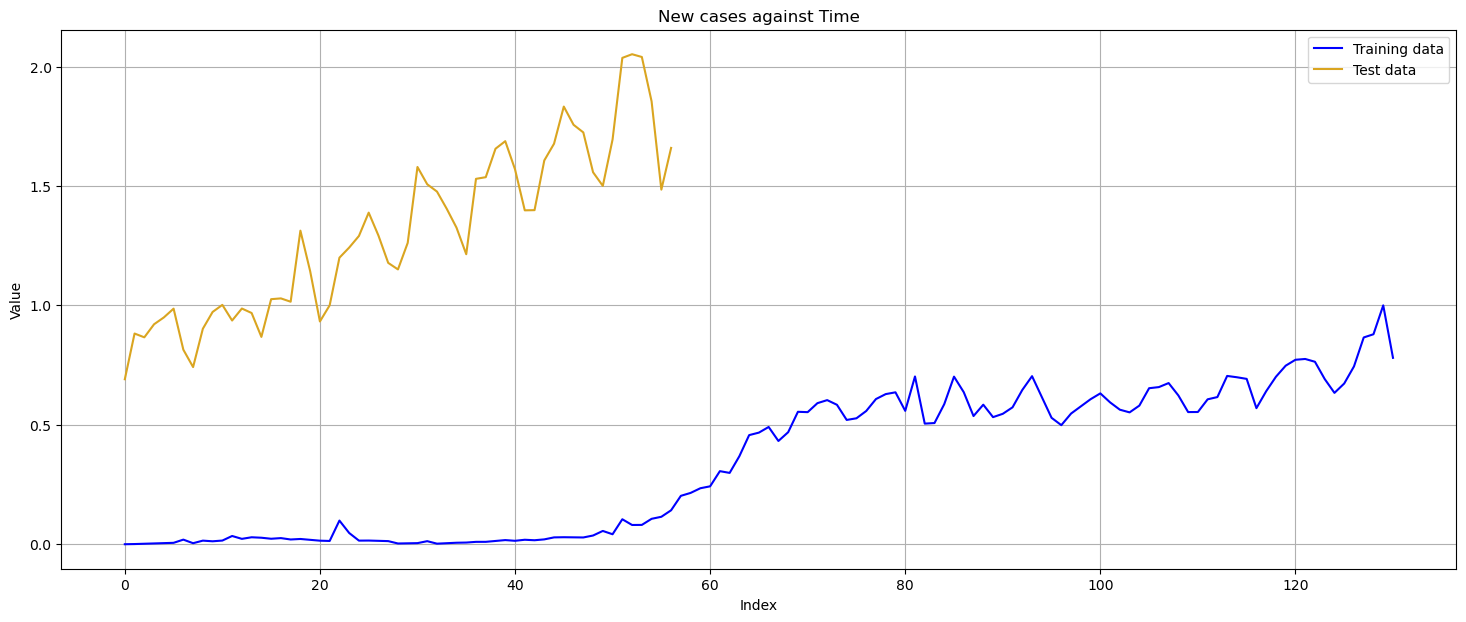

In [13]:
# plot time plot for training and test dataset 
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
ax.set_title("New cases against Time")
ax.grid(True)
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.plot(
    train_scaled,
    color='blue', label='Training data');
ax.plot(
    test_scaled,
    color='goldenrod', label='Test data')
ax.legend();

## DEVELOPMENT

In [14]:
# write a helper function which slices through the features using the sequence_length parameter and index the labe at the time step
# function should return features in sequence and labels
def sequencing_data(data, sequence_length):
    """
    Helper function to sample sub-sequence of training data.
    Input data must be in np.ndarray.
    """
    x, y = [], []

    for i in range(data.shape[0] - sequence_length):

        # copy the sequences of data starting at this index
        x.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return x, y

# calling the helper function and store them in variables
#Taille de la fenetre : Prendre 7 valeurs pour predire la 4 eme informations pour ne pas entrer dans le underfitting ou overfitting
X_sequence_train, y_sequence_train = sequencing_data(train_scaled, 7)
X_sequence_test, y_sequence_test = sequencing_data(test_scaled, 7)

# sanity check 
print("Total samples for X train: " + str(len(X_sequence_train)))
print("Total samples for y train: " + str(len(y_sequence_train)))
print("Total samples for X test: " + str(len(X_sequence_test)))
print("Total samples for y test: " + str(len(y_sequence_test)))






 

Total samples for X train: 124
Total samples for y train: 124
Total samples for X test: 50
Total samples for y test: 50


In [15]:
# write custom Dataset to transform list object into Dataset object
class CovidDataset(Dataset):
    """
    Convert input data into torch FloatTensor. 
    Inherit Dataset class. Return length of instance when len method is called and return specific sample
    of data when indexed.
    """ 
    def __init__(self, x, y):
        self.x = torch.FloatTensor(x)
        self.y = torch.FloatTensor(y)
        
    def __len__(self):
        return self.x.size(0)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [16]:
# declare batch size
batch_size = 4

# convert into Dataset using customized class
train_Dataset = CovidDataset(X_sequence_train, y_sequence_train)
test_Dataset = CovidDataset(X_sequence_test, y_sequence_test)

# convert into DataLoader
train_loader = DataLoader(train_Dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_Dataset, batch_size=batch_size, shuffle=False)

# declare a dict object
dataloaders = {'train': train_loader, 'test': test_loader} 

/var/folders/_8/n21p2rcd5sd4yqhw8z4mbdr40000gn/T/ipykernel_60184/433742148.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:248.)
  self.x = torch.FloatTensor(x)


In [17]:
class MLP(nn.Module):
    """MLP model with configurable input size and output size."""
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.input = nn.Linear(input_size, 64)
        self.linear1 = nn.Linear(64, 16)
        self.output = nn.Linear(16, output_size)
    
    def forward(self, x):
        x = x.view(-1, 1, 7)
        out = F.relu(self.input(x))
        out = F.relu(self.linear1(out))
        out = self.output(out)
        return out

In [18]:
# reproducibility
torch.manual_seed(38)

# setting hyperparameter
input_size = 7
output_size = 1
epochs = 100
learning_rate = 0.002

# instantiate the model
model = MLP(input_size, output_size)

# continue setting hyperparameter
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


 

In [19]:
 


# implement model training and validation loop
loss_score = {'train': [], 'test': []}
for epoch in range(epochs):
#     print(f'Epoch {epoch+1}/{epochs}')
    for phase in ['train', 'test']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        loss_cumsum = 0.0
        total_iterations = 0.0

        for i, (X, y) in enumerate(dataloaders[phase]):
            with torch.set_grad_enabled(phase == 'train'):
                out = model(X)
                loss = criterion(out.squeeze(), y.squeeze())

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            loss_cumsum += loss.item() * out.size(0)
            total_iterations += out.size(0)

        epoch_loss = loss_cumsum / total_iterations
        print(f'{phase.upper()} Loss: {epoch_loss}')
        loss_score[phase].append(epoch_loss)







 

TRAIN Loss: 0.09762839248944674
TEST Loss: 0.5389147925376893
TRAIN Loss: 0.01015921241618813
TEST Loss: 0.1096006939560175
TRAIN Loss: 0.0038075792084958766
TEST Loss: 0.10375305391848087
TRAIN Loss: 0.003611153508010771
TEST Loss: 0.09649964034557343
TRAIN Loss: 0.0033957922005943292
TEST Loss: 0.08723395608365536
TRAIN Loss: 0.0031155415382536668
TEST Loss: 0.08961940795183182
TRAIN Loss: 0.002967458594808235
TEST Loss: 0.08500762000679969
TRAIN Loss: 0.002987831757749401
TEST Loss: 0.08106560992076993
TRAIN Loss: 0.0029782167356085755
TEST Loss: 0.09556550990790129
TRAIN Loss: 0.0028704962526042493
TEST Loss: 0.08388473924249411
TRAIN Loss: 0.0027171301731986233
TEST Loss: 0.07301245914772153
TRAIN Loss: 0.002669484419217746
TEST Loss: 0.08074786938726902
TRAIN Loss: 0.003191998657008122
TEST Loss: 0.10230659164488315
TRAIN Loss: 0.002759337950039715
TEST Loss: 0.07726455174386501
TRAIN Loss: 0.002628100751486096
TEST Loss: 0.07878196969628334
TRAIN Loss: 0.0025718327022097526
TEST

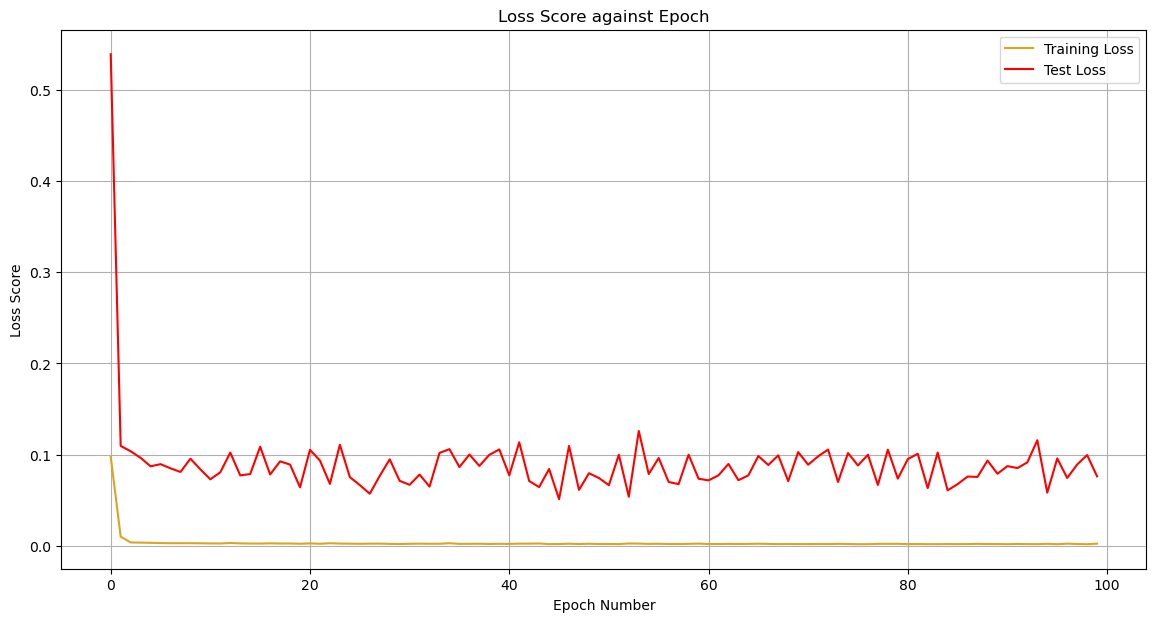

In [20]:
# plot loss scores
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
ax.set_title("Loss Score against Epoch")
ax.grid(True)
ax.set_xlabel("Epoch Number")
ax.set_ylabel("Loss Score")

ax.plot(loss_score['train'], color='goldenrod', label='Training Loss')
ax.plot(loss_score['test'], color='red', label='Test Loss')
ax.legend();

## EVALUATION

In [21]:
# model predictions

model.eval()
df_train, df_test = train_test_split(covid, train_size=0.7, shuffle=False)
predictions = []
count = 0

# model predictions
with torch.no_grad():
    for i, (X, y) in enumerate(DataLoader(test_Dataset, 1)):
        count += 1
        output = model(X)
        predictions.append(output.item())
        
# convert list into np array and inverse transform it into proper values before feature scaling
predictions = np.array(predictions)
predictions = scaler.inverse_transform(predictions.reshape(1,-1))

# remove beginning 3 rows of data since at least 3 data are needed to make a prediction
df_test = df_test.iloc[7:]
df_test['preds'] = predictions.squeeze()

# compute MSE
RMSE = mean_squared_error(df_test.preds, df_test.NewCases, squared=False)
print(f"The RMSE for the model is {RMSE}")

The RMSE for the model is 38054.37240157385


138    103154.952861
139    103939.959075
140    119496.197318
141    128666.718255
142    129506.784663
143    123563.750658
144    116497.199512
145    116169.023668
146    116479.733386
147    131708.683059
148    133471.726569
149    128128.735304
150    144812.187657
151    133629.841832
152    113628.910103
153    127030.653311
154    143448.844020
155    142829.314145
156    155146.580206
157    151645.073922
158    136788.466551
159    136544.006520
160    145078.960951
161    156959.179535
162    173790.116311
163    171023.551062
164    160543.465067
165    153255.851596
166    150044.499882
167    152524.755408
168    184021.733118
169    182554.414277
170    179544.473442
171    178687.532423
172    166216.817496
173    157847.224387
174    173689.115114
175    189564.245701
176    195464.477019
177    196954.519896
178    187753.322331
179    177499.868760
180    173369.483376
181    182543.882023
182    200021.903417
183    216946.168125
184    211320.169763
185    203384

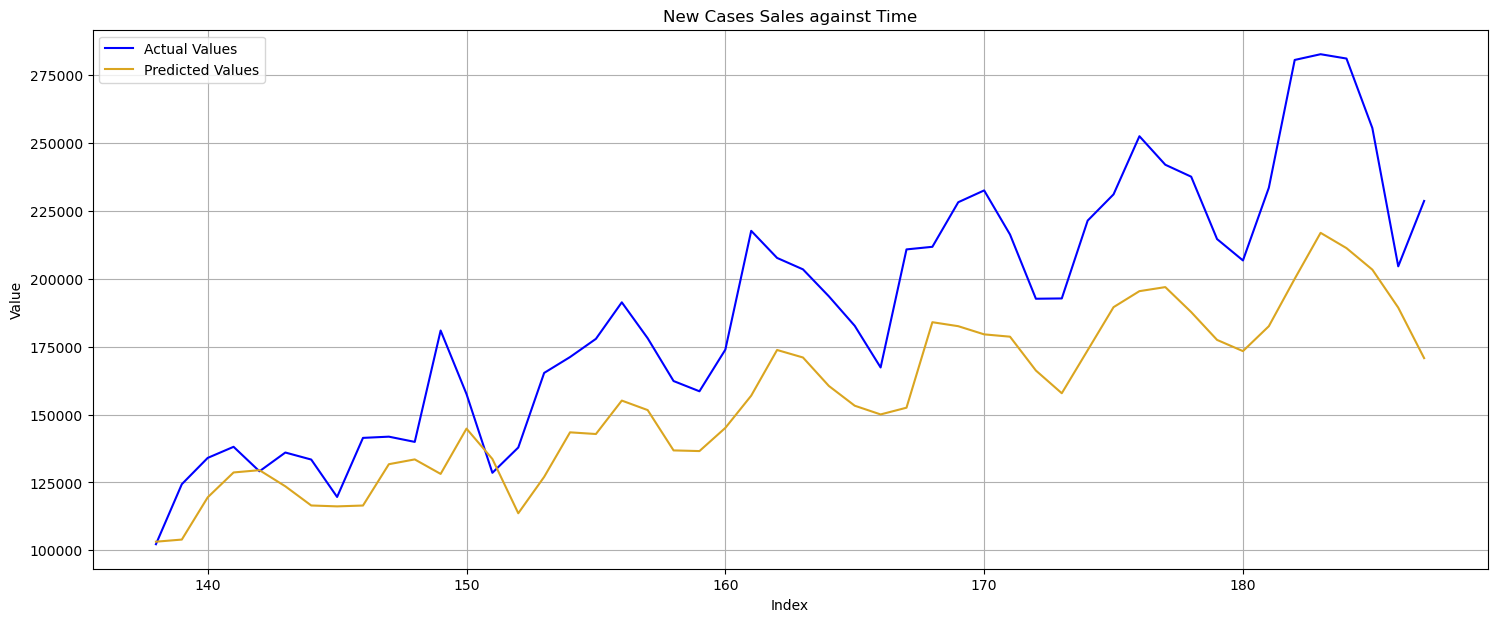

In [22]:
# print prediction results
print(df_test['preds'])

# plot time plot for predictions and ground truth 
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
ax.set_title("New Cases Sales against Time")
ax.grid(True)
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.plot(
    df_test['NewCases'],
    color='blue', label='Actual Values');
ax.plot(
    df_test['preds'],
    color='goldenrod', label='Predicted Values')
ax.legend();

## <a name="reference">Reference</a>
1. [Pytorch](https://pytorch.org/)

## <a name="bonus">Bonus</a>

The first neural network to be applied to a real-world problem is MADALINE, which stands for Multiple ADAptive LINear Elements. It was developed by Bernard Widrow and Marcian Hoff of Stanfor from 1959.

Source: [3.0 History of Neural Networks](http://www2.psych.utoronto.ca/users/reingold/courses/ai/cache/neural4.html#:~:text=In%201959%2C%20Bernard%20Widrow%20and,to%20a%20real%20world%20problem.)